# <center> MSAI511 Week 5 Assignment 
 ## <center> Public Health Factors have the Greatest Impact on Life Expectancy

## Introduction

The study "Impact of Healthy Lifestyle Factors on Life Expectancy and Lifetime Health Care Expenditure: Nationwide Cohort Study" focuses on understanding how healthy lifestyle factors influence life expectancy and lifetime health care expenditures. The research is motivated by the established association between lifestyle risk factors and mortality and chronic diseases. However, more needs to be explored on how healthy lifestyle factors impact lifetime healthcare costs using longitudinal data to fill gaps in existing literature by providing insights into the economic implications of healthy lifestyle choices, particularly regarding healthcare expenditures.

For this project, we will work with data from the Global Health Observatory (GHO) data repository by the World Health Organization (WHO) ( https://apps.who.int/gho/data/node.main.688?lang=en). 


Methodology: A rolling extrapolation algorithm incorporating machine learning techniques such as Data Preprocessing (missing value imputation and handling multicollinearity), linear regression, and Recursive Feature Elimination with cross-validation (RFEC). We seek to discover the factors influencing life expectancy and find the combination of features needed for precise forecasts.

This analysis aims to determine the individual and combined effects of five healthy lifestyle factors on life expectancy and lifetime healthcare expenditures in a contemporary population.


### Task 1:

#### Read the raw data from the source file.

In [89]:
### Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [91]:
### Data Loading
df = pd.read_csv("https://raw.githubusercontent.com/PeckDJ/AI_W5_Assn_Public-Health-Factors-have-the-Greatest-Impact-on-Life-Expectancy-/refs/heads/main/Life_Expectancy_Data%20(2).csv")

# Display first 5 rows of dataset
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [93]:
df.shape

(2938, 22)

#### Perform feature engineering:

In [96]:
# 1. Population Size – Create a population range that includes three categories:

# Function to categorize population size
def Categorize_Population(size): 
    if size < 30000: 
        return 'Small' 
    elif 30000 <= size < 100000: 
        return 'Medium' 
    else: 
        return 'Large' 

# Apply the Categorize_Population function to the 'Population' column
df['Population_Size'] = df['Population'].apply(Categorize_Population)

# 2. Lifestyle – Create a lifestyle feature that combines alcohol consumption and BMI
df['Lifestyle'] = df['Alcohol'] + df[' BMI ']

# 3. Economy – Create an economy feature that combines population and GDP
df['Economy'] = df['Population'] * df['GDP']

# 4. Death Ratio – Determine the death ratio between adult and infant mortality
df['Death_Ratio'] = df.apply(lambda x: x['Adult Mortality'] / x['infant deaths'] if x['infant deaths'] > 0 else None, axis=1)

# Display the first 5 rows of the dataframe
df.head(5)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Population_Size,Lifestyle,Economy,Death_Ratio
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,Large,19.11,1.971086e+10,4.241935
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,612.696514,327582.0,17.5,17.5,0.476,10.0,Large,18.61,2.007083e+08,4.234375
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,Large,18.11,2.004633e+10,4.060606
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,Large,17.61,2.476810e+09,3.942029
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,Large,17.21,1.892519e+08,3.873239


### Task 2

#### 1. Perform data cleaning by either removing any fragmented observations or by imputing missing values as necessary. 


In [99]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
Population_Size                     object
Lifestyle  

In [101]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Lifestyle,Economy,Death_Ratio
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,...,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2727.000000,2.264000e+03,2090.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,...,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,42.655431,6.141857e+10,40.273022
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,...,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,21.642336,2.616712e+11,57.525662
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,1.410000,9.614600e+03,0.001538
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,...,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,21.585000,2.170533e+08,4.607796
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,...,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,46.940000,1.689357e+09,15.443684
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,...,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,62.610000,1.602575e+10,49.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,87.310000,3.439953e+12,349.500000


In [103]:
# Inspect column names 
column_names = print(df.columns)


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Population_Size',
       'Lifestyle', 'Economy', 'Death_Ratio'],
      dtype='object')


In [105]:
# Dataframe with missing values

column_names = [
    'Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
    'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
    'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
    'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
    ' thinness  1-19 years', ' thinness 5-9 years',
    'Income composition of resources', 'Schooling', 'Population_Size',
    'Lifestyle', 'Economy', 'Death_Ratio'
]

# Generate some random data with missing values
data = np.random.rand(100, len(column_names))
data[np.random.rand(*data.shape) < 0.1] = np.nan  # Add some missing values

df = pd.DataFrame(data, columns=column_names)

# Print the 'thinness 5-9 years' column
print(df[' thinness 5-9 years'])

# Handle missing values by removing fragmented observations or imputing them
# Select only numeric columns for mean calculation
numeric_df = df.select_dtypes(include=['number'])
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Select non-numeric columns
non_numeric_df = df.select_dtypes(exclude=['number'])

# Combine the dataframes back
df = pd.concat([numeric_df, non_numeric_df], axis=1)

# Check for any remaining missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

0     0.937411
1     0.905555
2     0.137857
3     0.501172
4     0.393693
        ...   
95    0.605091
96    0.602332
97    0.830516
98    0.703568
99    0.049550
Name:  thinness 5-9 years, Length: 100, dtype: float64
Series([], dtype: int64)


#### 2. Generate scatter plots between each predictor with the target variable to check the linear relationship and apply data transformations like log transform, if necessary.

In [108]:
# List of the columns that can be the features concerning life expectancy

features = [' HIV/AIDS', 'Measles ', 'Hepatitis B', ' BMI ', 'Polio', 'Adult Morta',
            'thinness 5-9 years', 'infant deaths', 'GDP', 'Schooling', 'Alcohol',
            'Total expenditure', 'percentage expenditure', ' thinness  1-19 years',
            'Lifestyle', 'Economy', 'Death_Ratio']

print(df)


     Country      Year    Status  Life expectancy   Adult Mortality  \
0   0.511005  0.196458  0.976568          0.501027         0.296160   
1   0.875781  0.625123  0.412657          0.831077         0.062512   
2   0.165858  0.968011  0.211360          0.228528         0.225381   
3   0.953778  0.355636  0.807286          0.580856         0.847053   
4   0.256587  0.106279  0.011143          0.220128         0.742456   
..       ...       ...       ...               ...              ...   
95  0.044213  0.767733  0.532972          0.263354         0.059870   
96  0.786230  0.763678  0.590360          0.393120         0.280775   
97  0.975072  0.954118  0.227196          0.531468         0.624775   
98  0.210848  0.544894  0.886719          0.245883         0.849169   
99  0.152565  0.945482  0.499044          0.760562         0.903509   

    infant deaths   Alcohol  percentage expenditure  Hepatitis B  Measles   \
0        0.738602  0.116103                0.805585     0.242979  0.1



#### Generate scatter plots

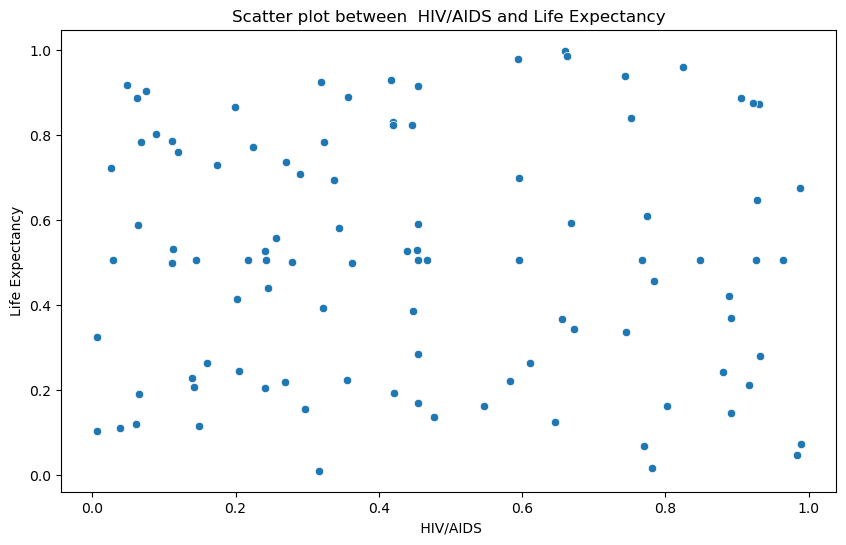

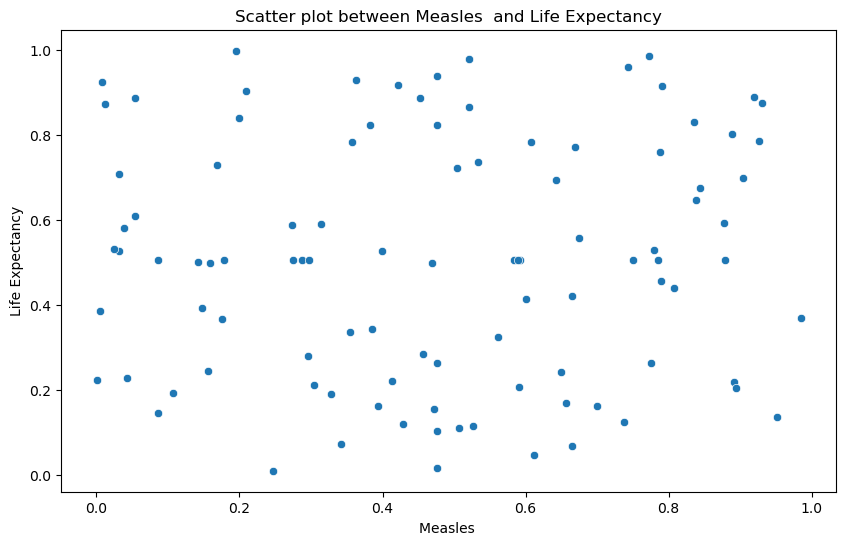

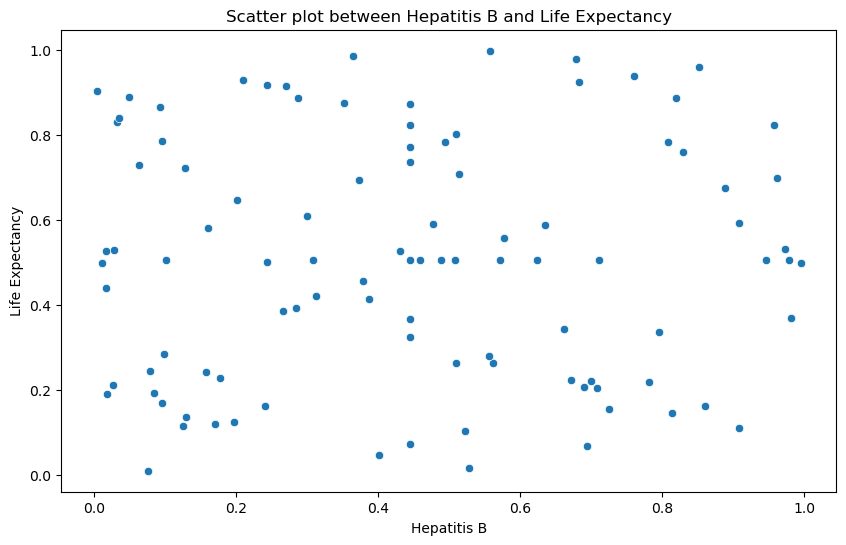

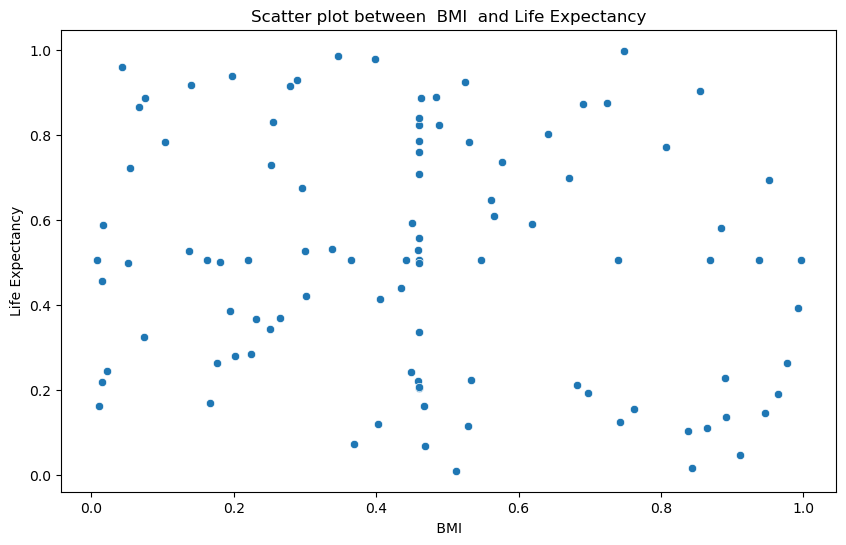

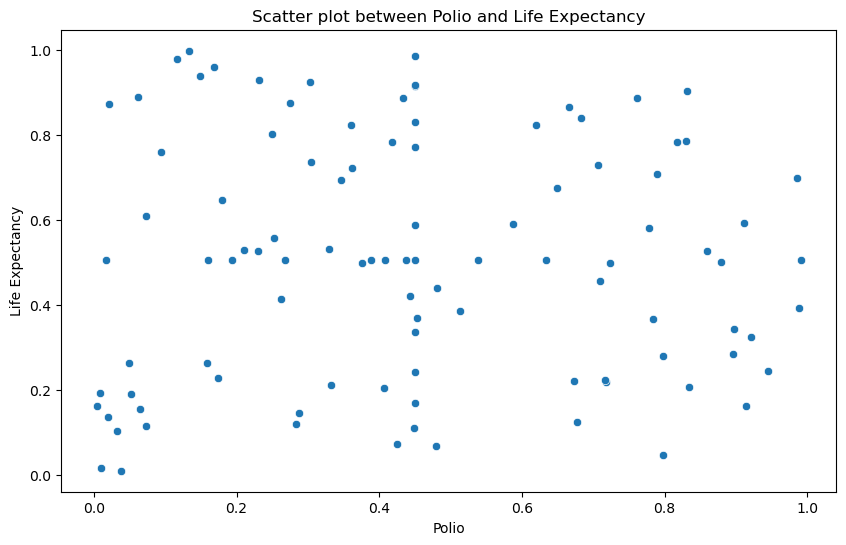

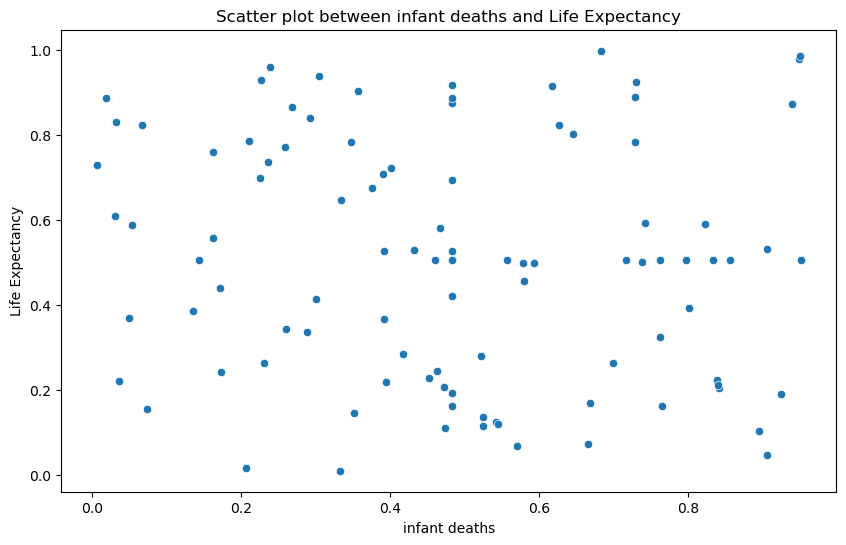

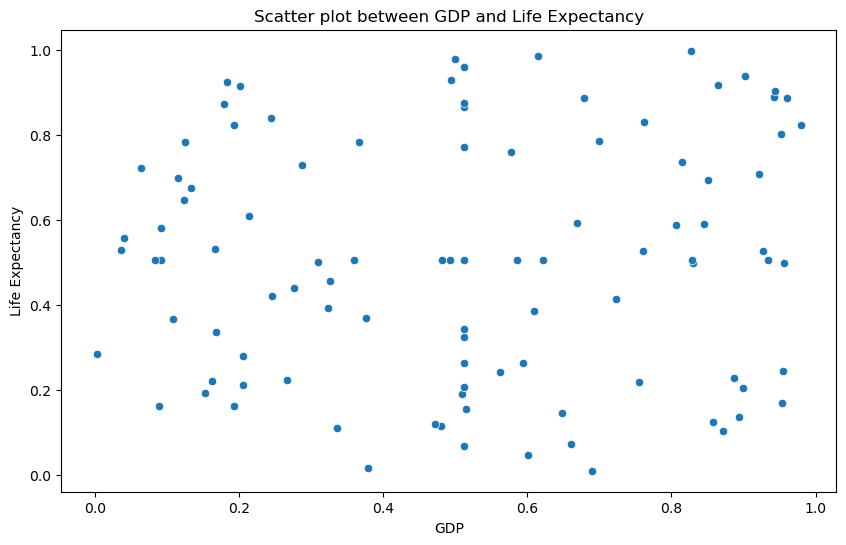

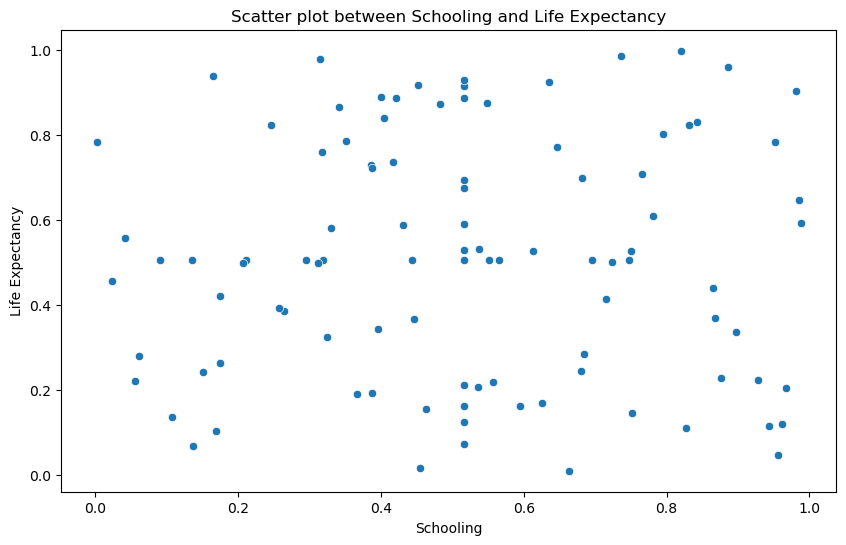

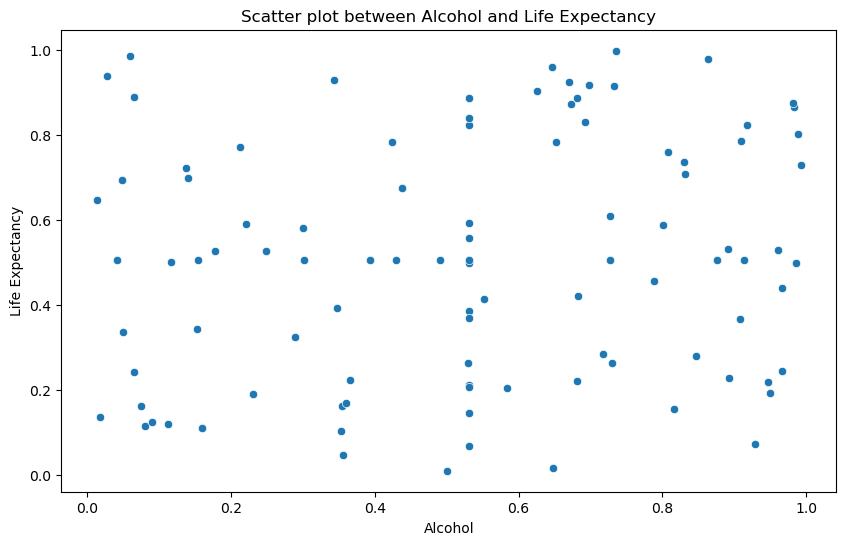

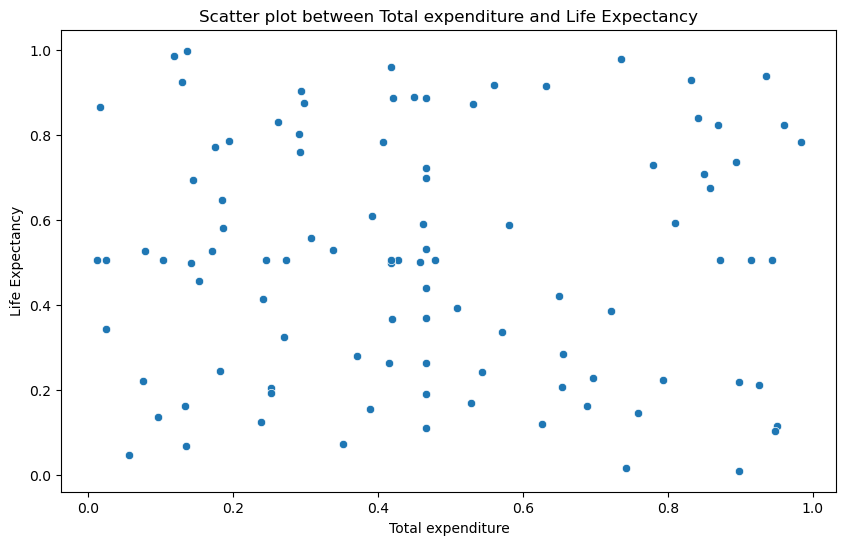

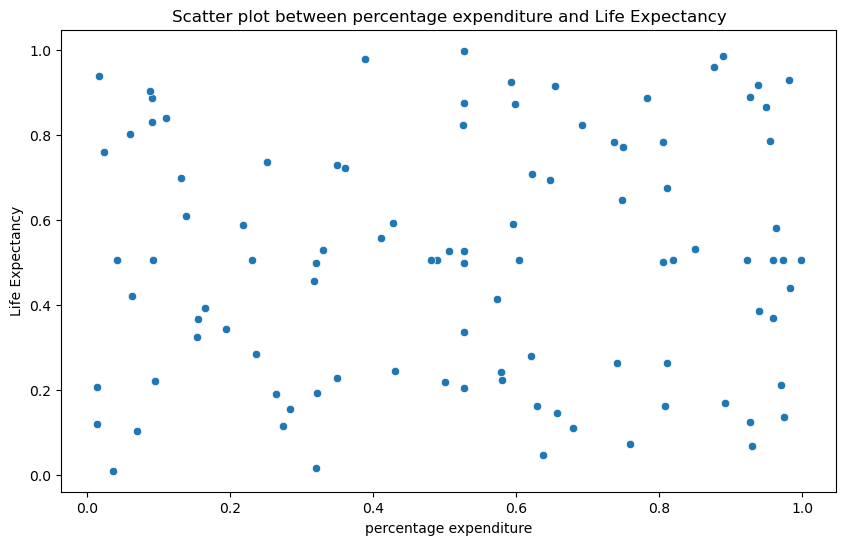

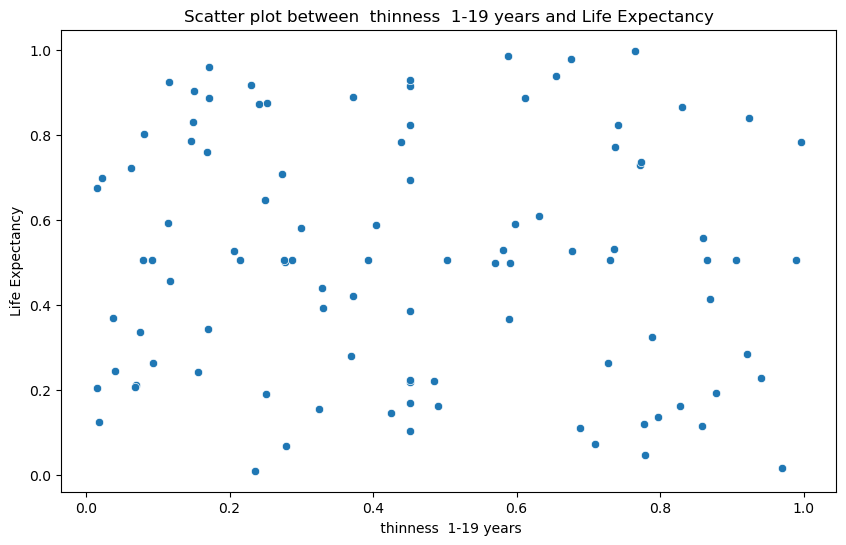

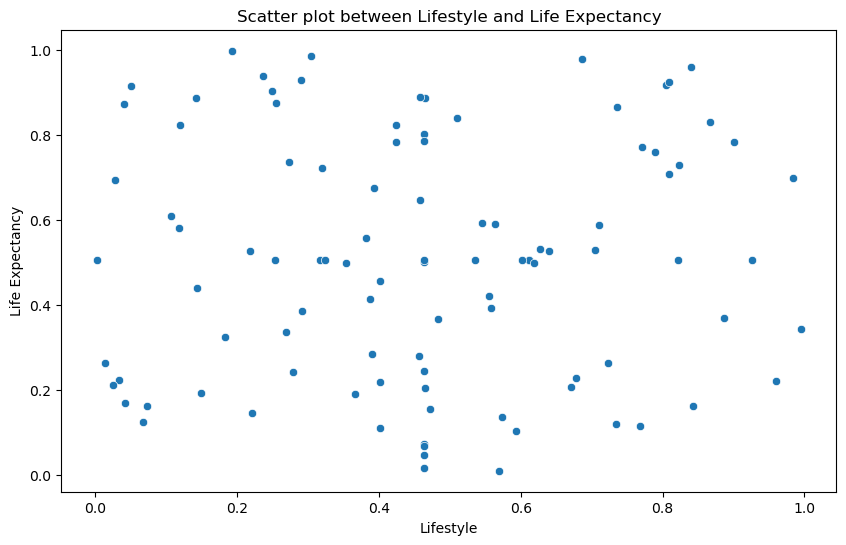

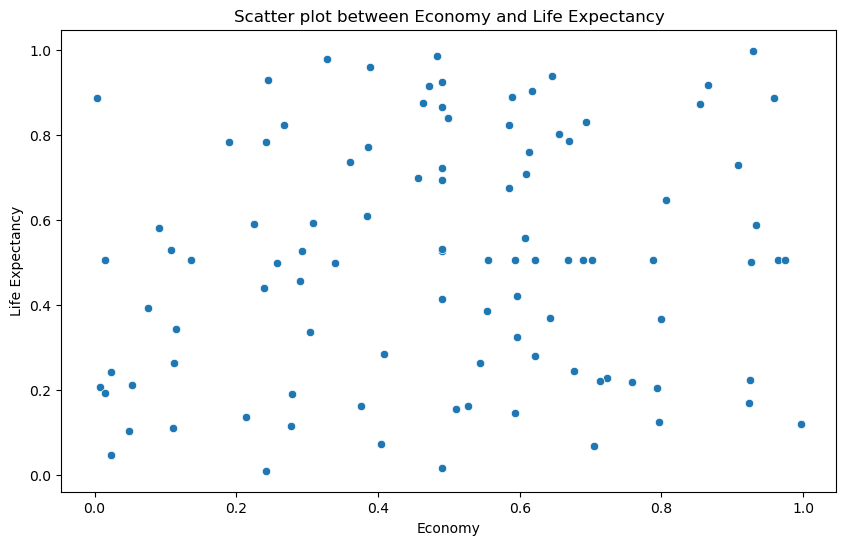

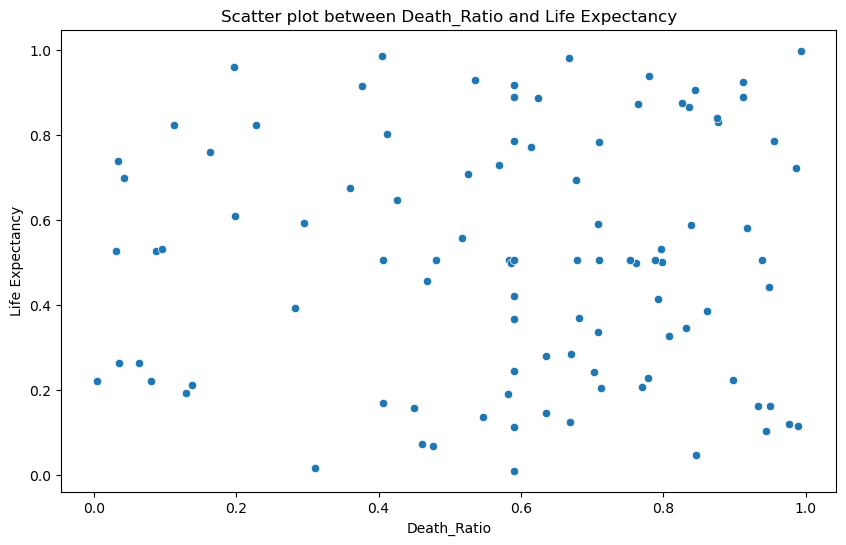

In [111]:
 # Check if the column exists in the DataFrame before plotting

for feature in features:
    if feature in df.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[feature], y=df['Life expectancy '])
        plt.title(f'Scatter plot between {feature} and Life Expectancy')
        plt.xlabel(feature)
        plt.ylabel('Life Expectancy')
        plt.show()
    else:
        print(f"Warning: Column '{feature}' not found in the DataFrame.")

### Task 3

#### Generate a correlation heat map to assess multicollinearity with the threshold set as 0.75. All variables above 0.75 need to be dropped. 


Series([], dtype: int64)


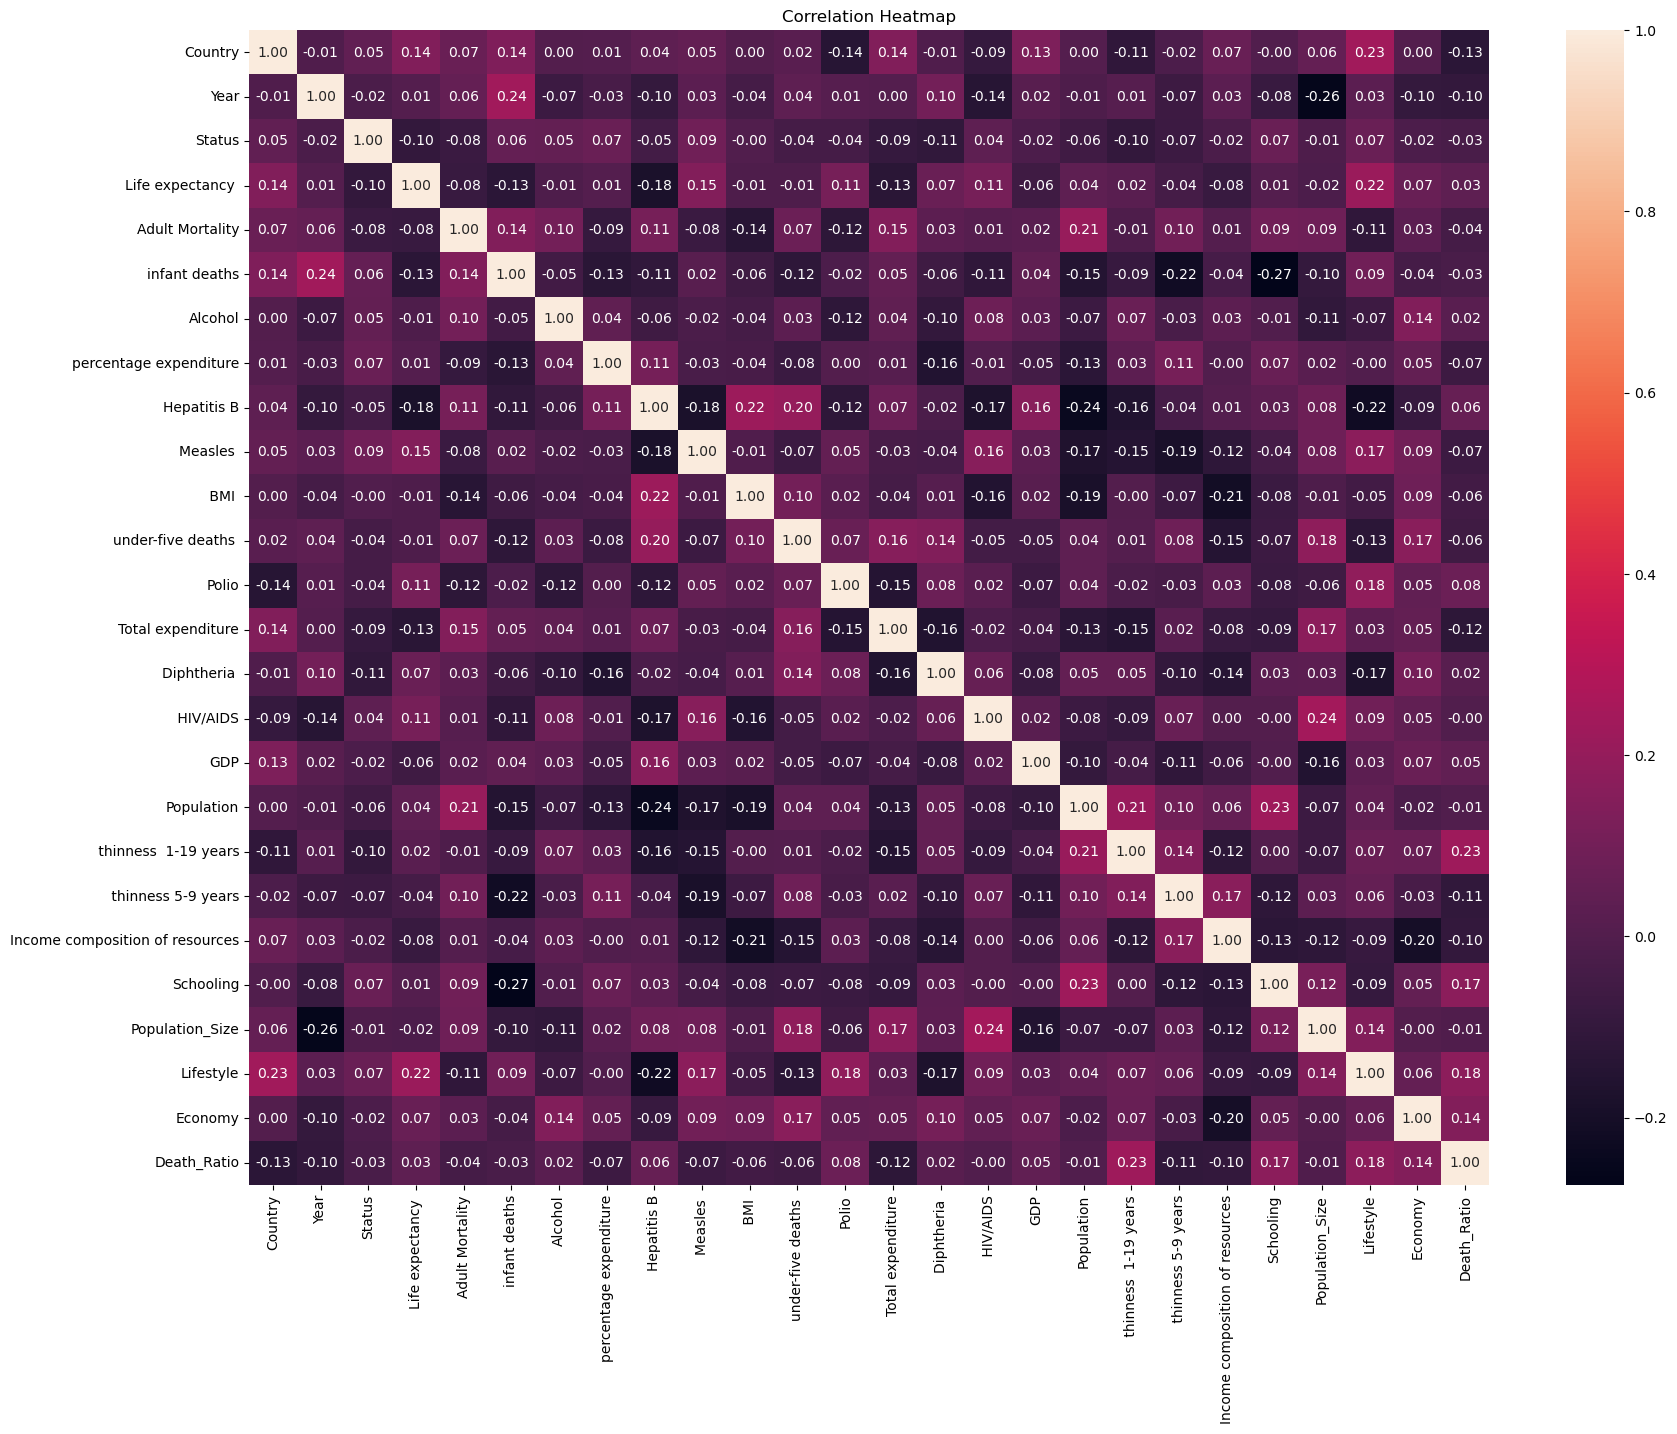

    Country      Year    Status  Life expectancy   Adult Mortality  \
0  0.262224  0.358386  0.198433          0.816835         0.588528   
1  0.436737  0.704685  0.100780          0.076947         0.604950   
2  0.439965  0.346526  0.875570          0.670311         0.897988   
3  0.112901  0.455140  0.601812          0.767329         0.842320   
4  0.003816  0.778411  0.481229          0.391296         0.577603   

   infant deaths   Alcohol  percentage expenditure  Hepatitis B  Measles   \
0       0.279660  0.999651                0.919202     0.691576  0.293883   
1       0.902263  0.652867                0.213977     0.246721  0.675355   
2       0.198875  0.642832                0.532071     0.554321  0.249227   
3       0.524406  0.782642                0.203171     0.532114  0.348801   
4       0.719697  0.224474                0.092154     0.301032  0.791442   

   ...       GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0  ...  0.527612    0.541184            

In [114]:
# Select columns for correlation calculation

# Generate some random data with missing values
data = np.random.rand(100, len(column_names))
data[np.random.rand(*data.shape) < 0.1] = np.nan  # Add some missing values

df = pd.DataFrame(data, columns=column_names)

# Handle missing values by removing fragmented observations or imputing them
# Select only numeric columns for mean calculation
numeric_df = df.select_dtypes(include=['number'])
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Combine the dataframes back
non_numeric_df = df.select_dtypes(exclude=['number'])
df = pd.concat([numeric_df, non_numeric_df], axis=1)

# Check for any remaining missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Generate correlation matrix on numeric data only
correlation_matrix = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Drop features with correlation above 0.75 (considering only numeric features)
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]

# Drop highly correlated features from the original DataFrame
df_reduced = df.drop(columns=to_drop)

# Check the reduced DataFrame
print(df_reduced.head())

### Task 4

#### 4.1 Eliminate possible outliers by generating box-whisker plots.

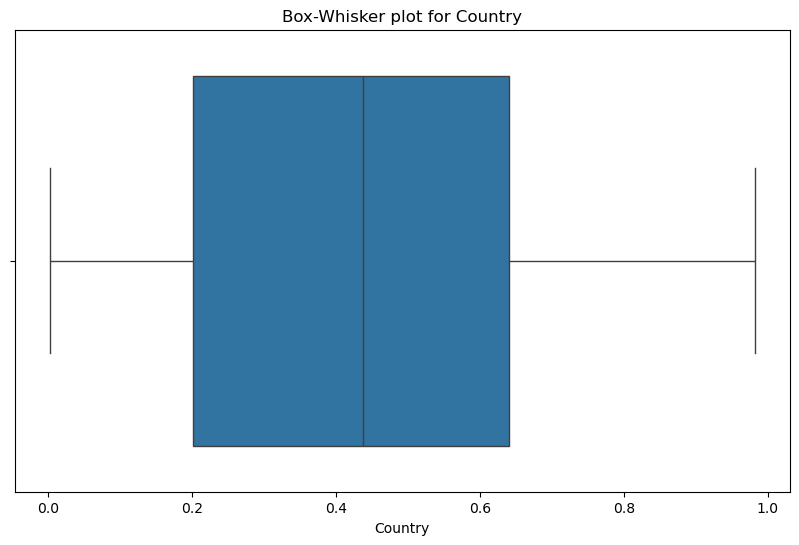

----------------------------------------------------------------


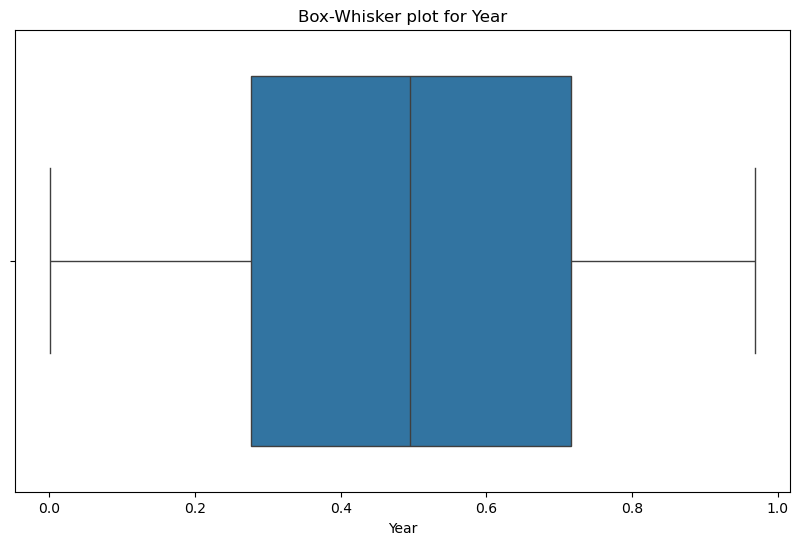

----------------------------------------------------------------


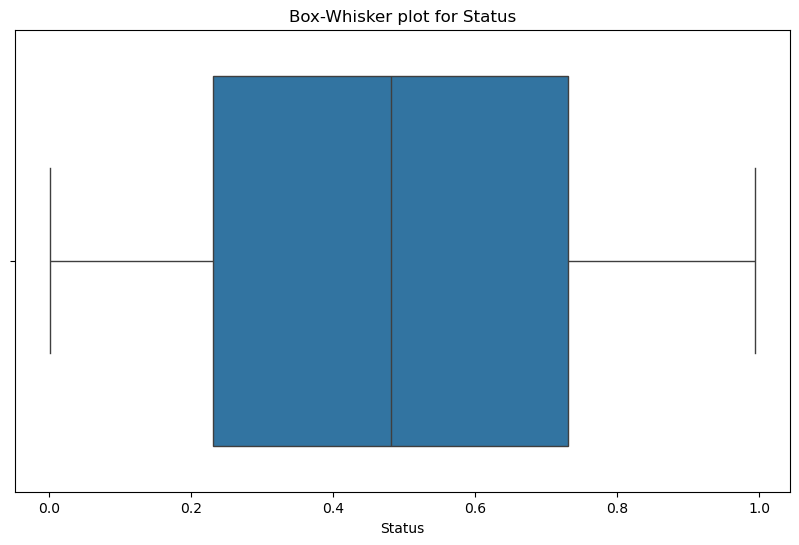

----------------------------------------------------------------


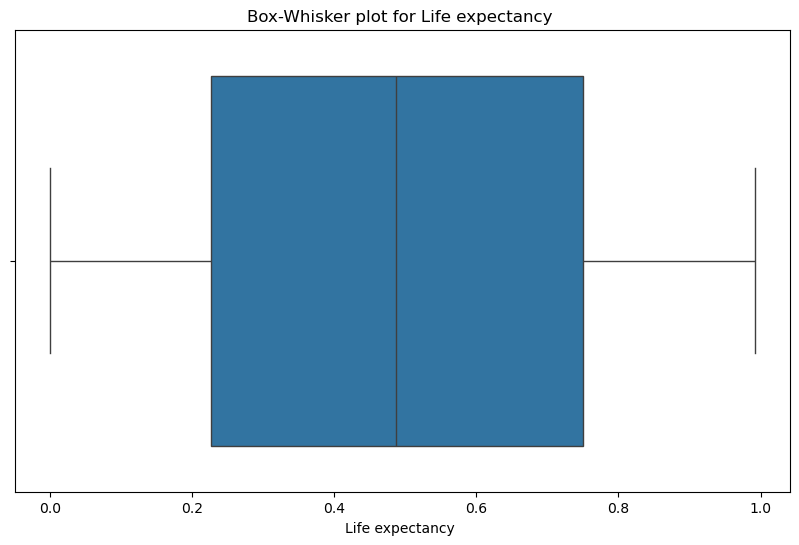

----------------------------------------------------------------


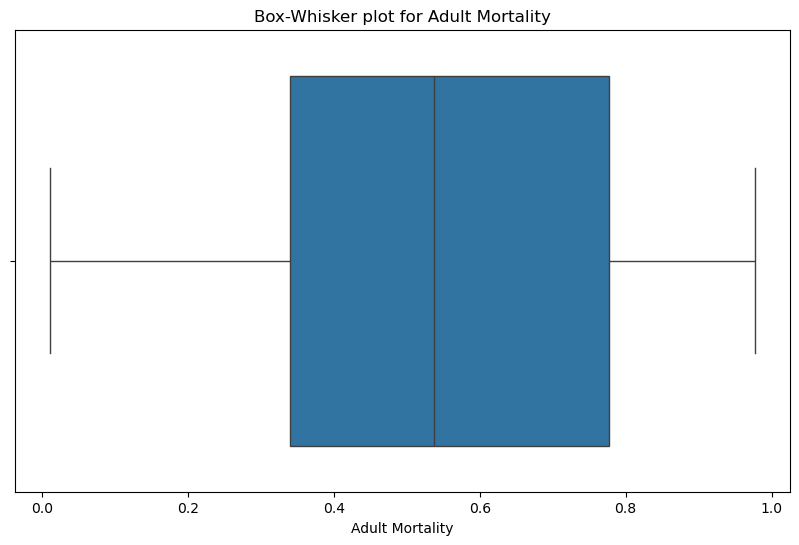

----------------------------------------------------------------


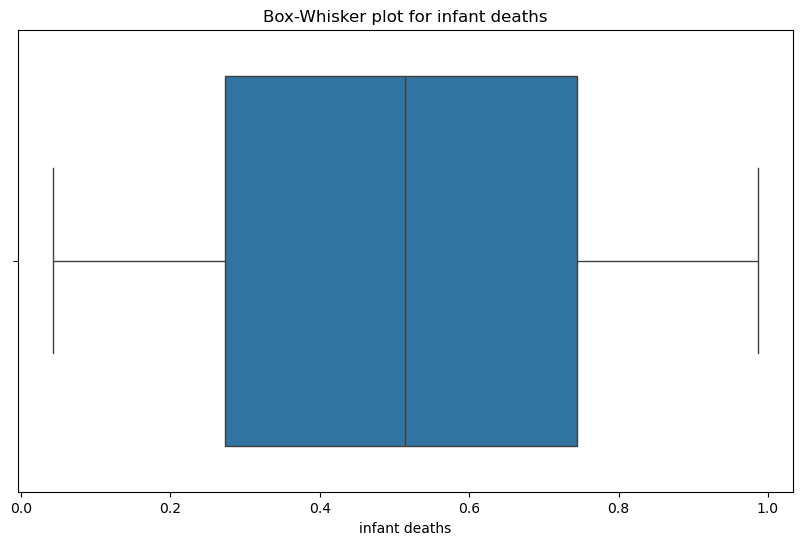

----------------------------------------------------------------


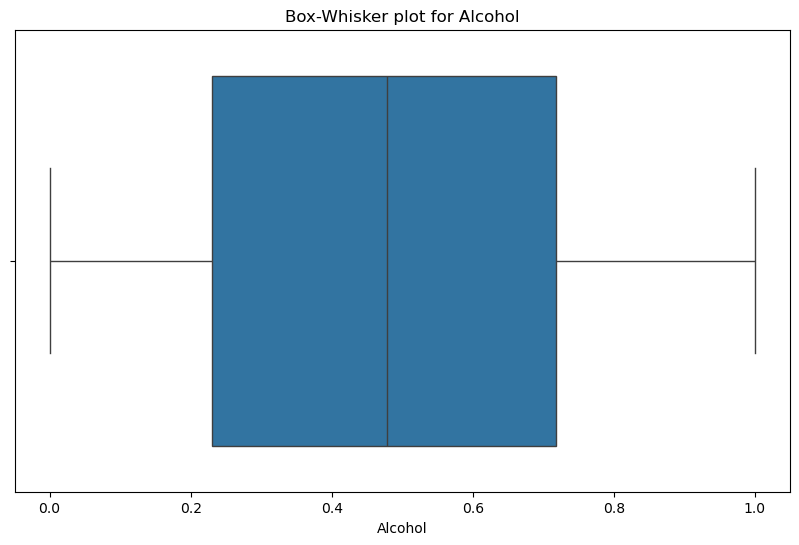

----------------------------------------------------------------


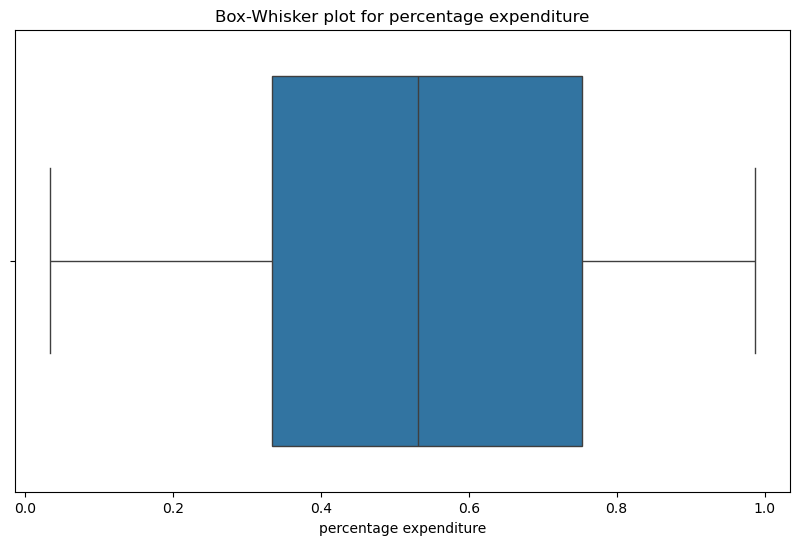

----------------------------------------------------------------


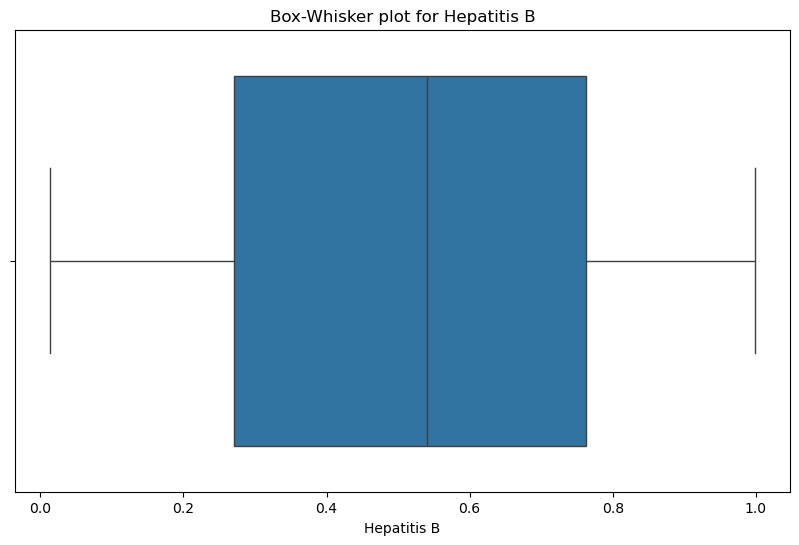

----------------------------------------------------------------


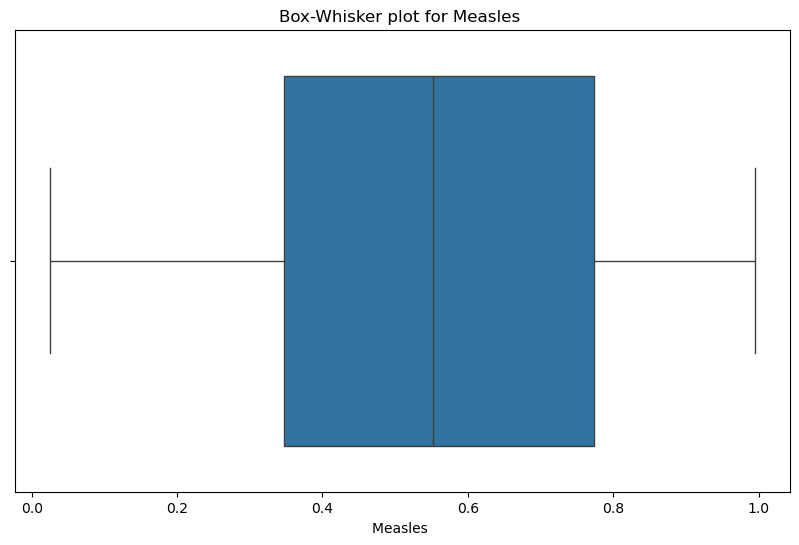

----------------------------------------------------------------


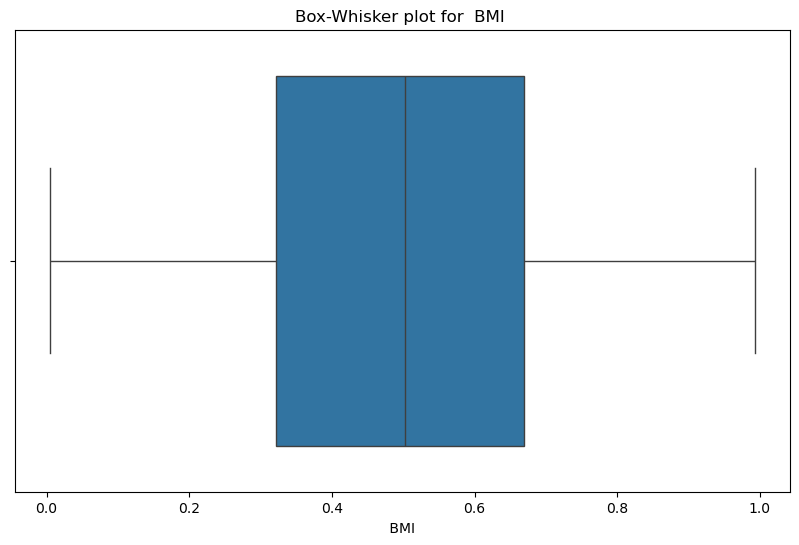

----------------------------------------------------------------


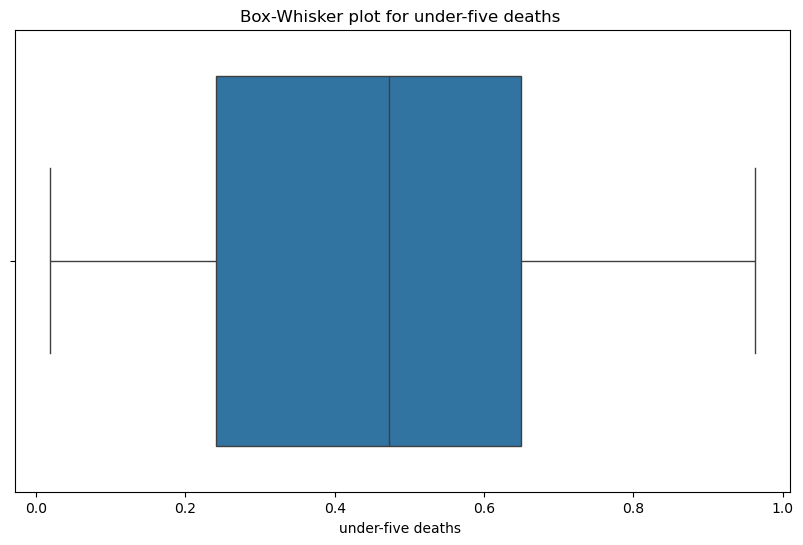

----------------------------------------------------------------


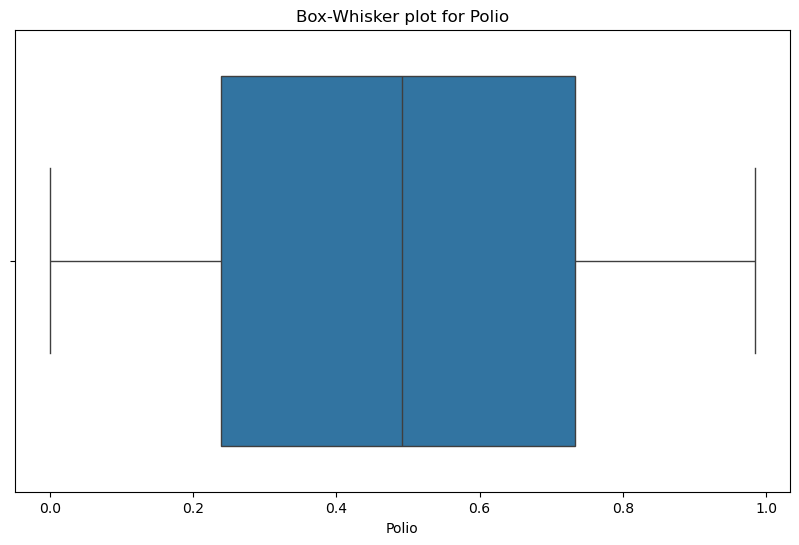

----------------------------------------------------------------


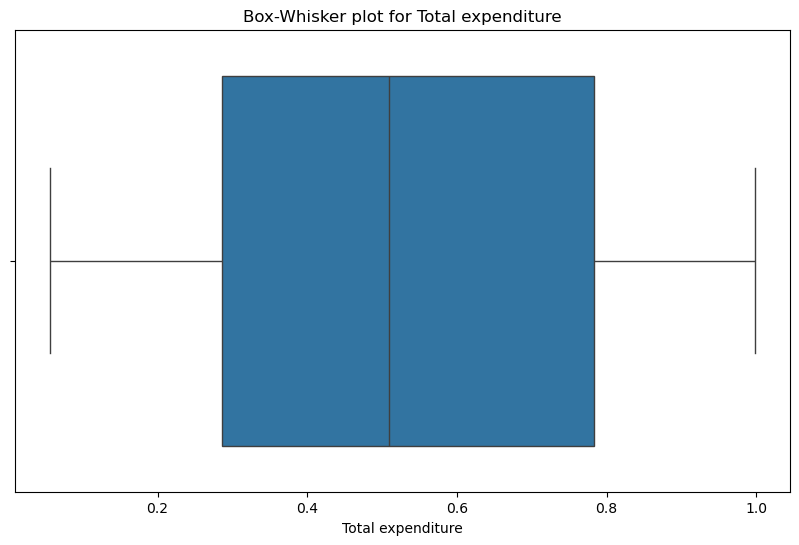

----------------------------------------------------------------


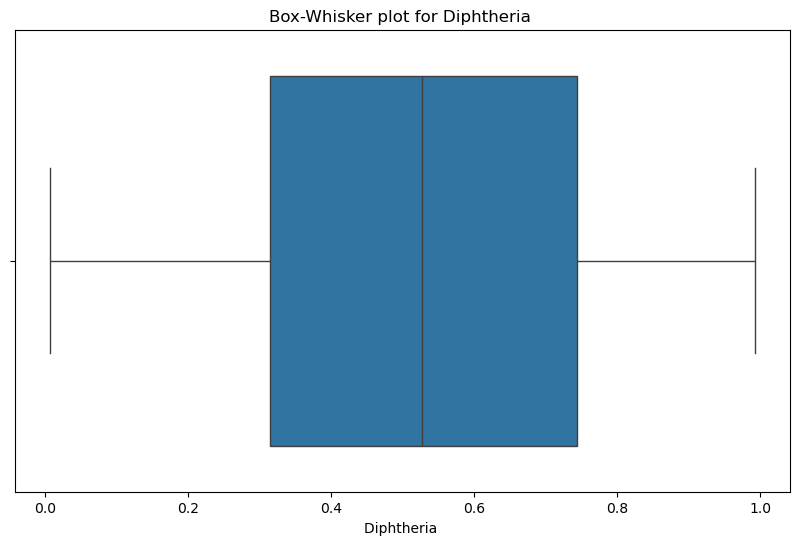

----------------------------------------------------------------


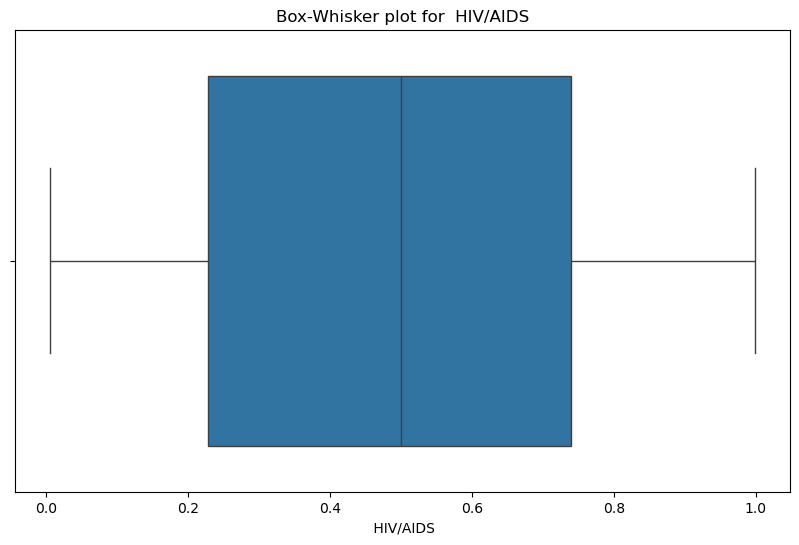

----------------------------------------------------------------


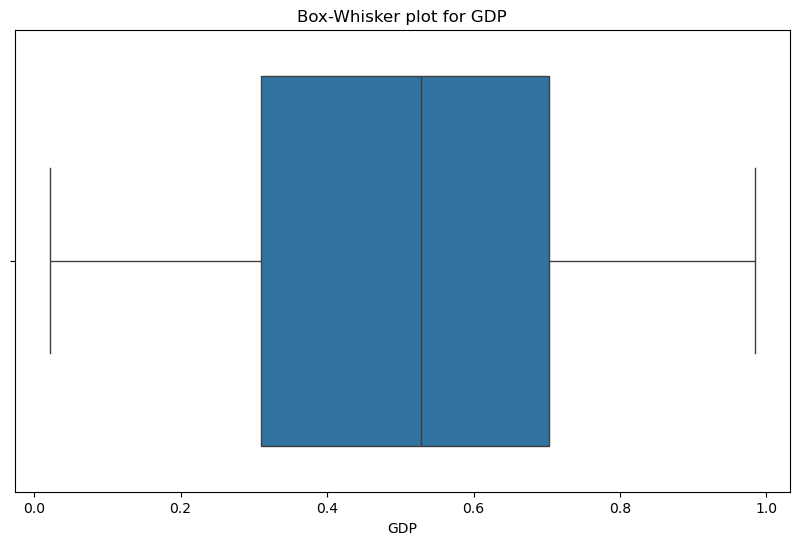

----------------------------------------------------------------


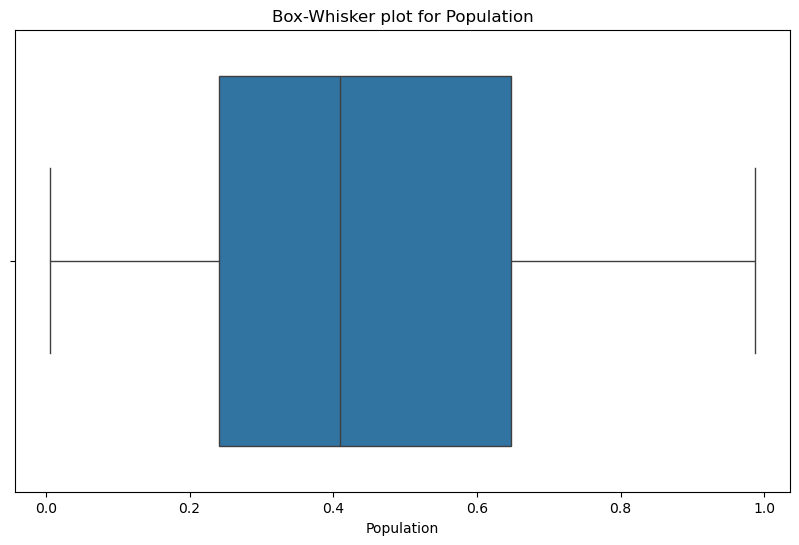

----------------------------------------------------------------


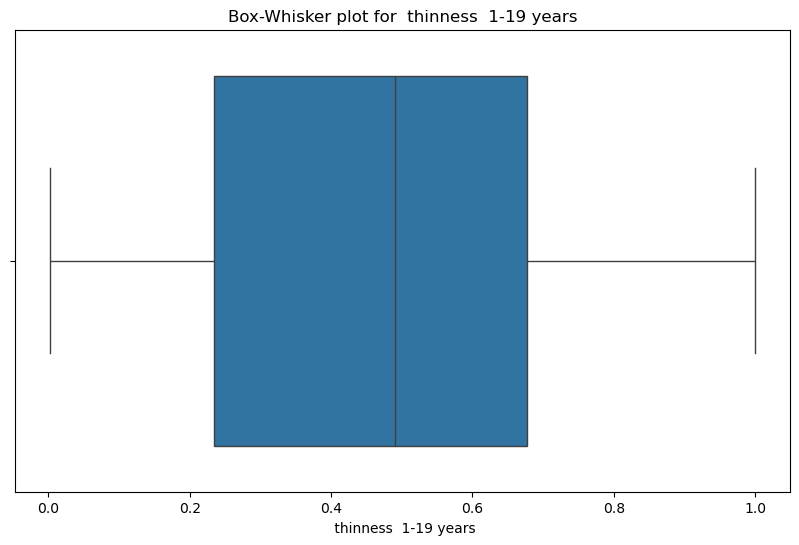

----------------------------------------------------------------


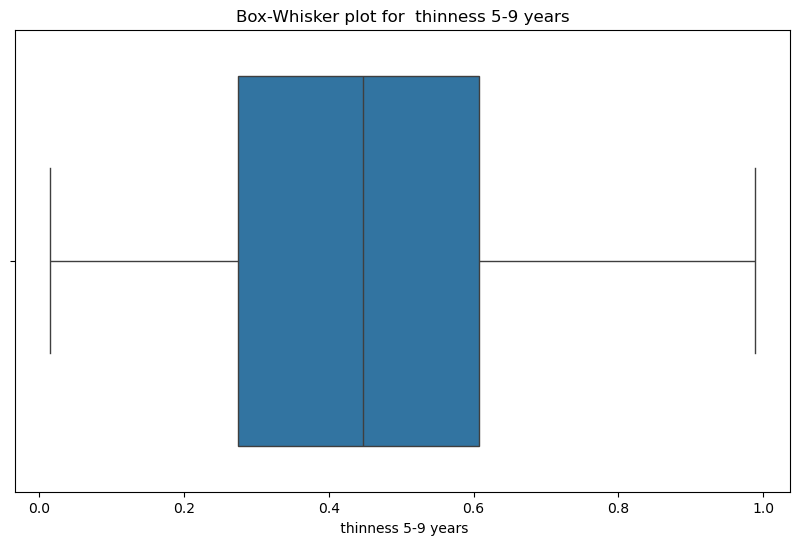

----------------------------------------------------------------


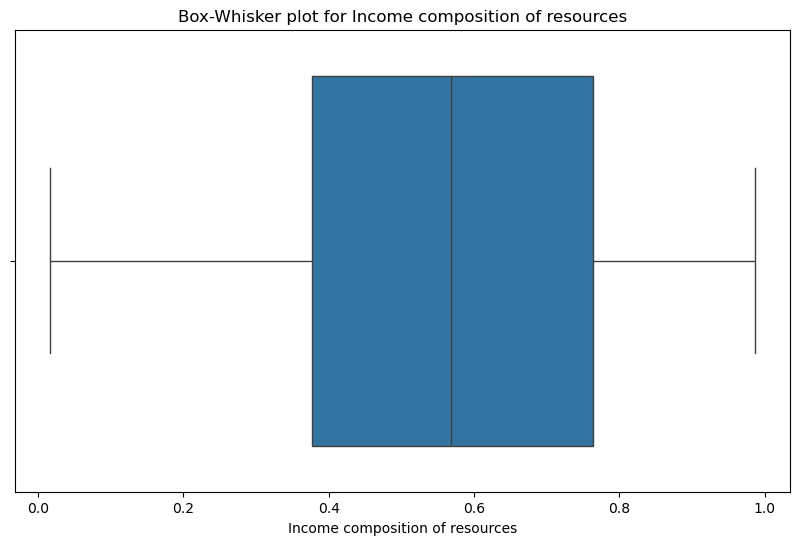

----------------------------------------------------------------


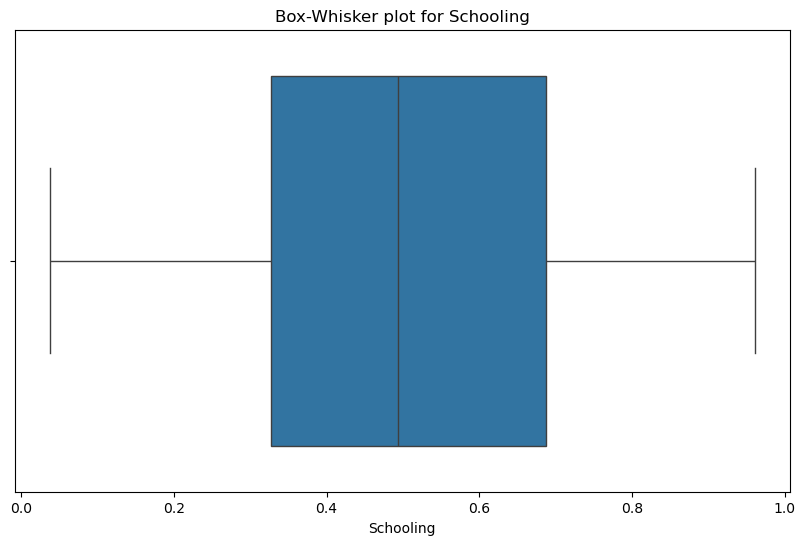

----------------------------------------------------------------


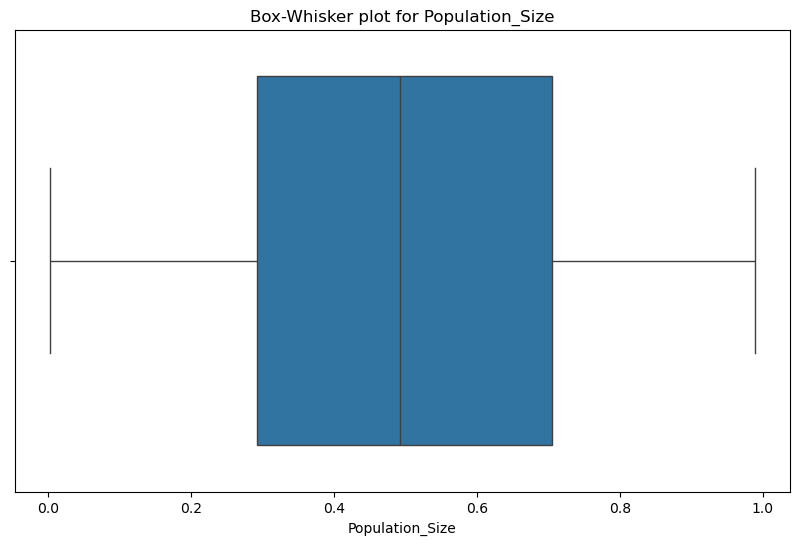

----------------------------------------------------------------


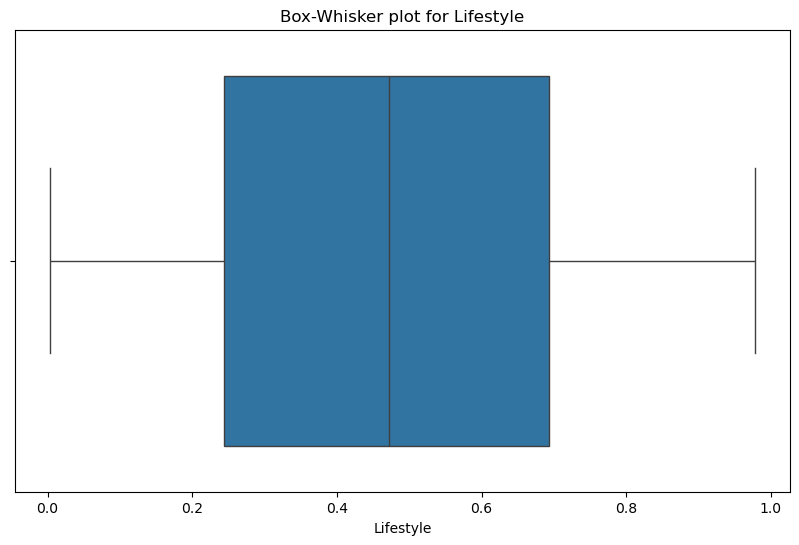

----------------------------------------------------------------


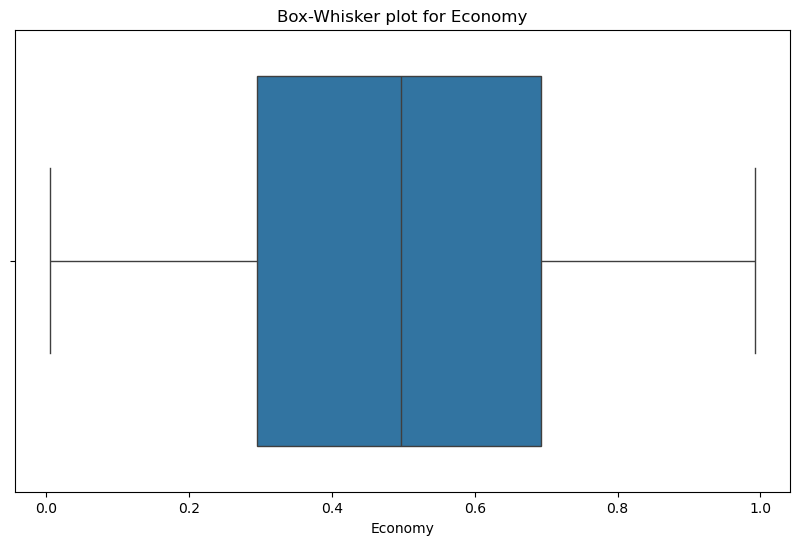

----------------------------------------------------------------


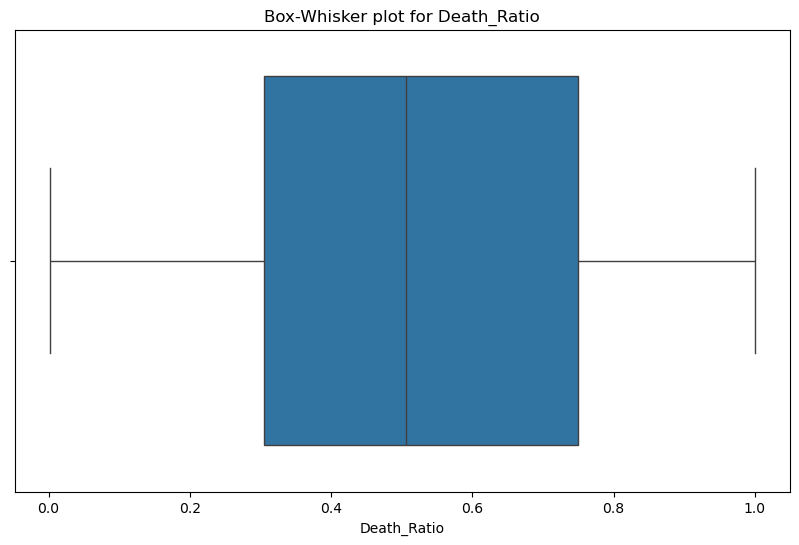

----------------------------------------------------------------


In [117]:
# Generate box-whisker plots for each feature

# Create a DataFrame
df_reduced = pd.DataFrame(df)

# Generate box-whisker plots for each feature

for feature in df_reduced.columns:
    if df_reduced[feature].dtype in ['float64', 'int64']:  # Only plot numeric
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df_reduced[feature])
        plt.title(f'Box-Whisker plot for {feature}')
        plt.show()
        print("----------------------------------------------------------------")
        

#### 4.2 Perform data analysis to answer the following questions:

1. Should a country having a lower life expectancy value (<65) increase its healthcare expenditure to improve its average lifespan?

In [121]:
# Grouping data by Life Expectancy < 65 and then calculate the average healthcare expenditure

low_life_expectancy = df_reduced[df_reduced['Life expectancy '] < 65]
high_life_expectancy = df_reduced[df_reduced['Life expectancy '] >= 65]

avg_healthcare_expenditure_low = low_life_expectancy['Total expenditure'].mean()
avg_healthcare_expenditure_high = high_life_expectancy['Total expenditure'].mean()

print(f"The Average Healthcare Expenditure Low: {avg_healthcare_expenditure_low:.2f},  High: {avg_healthcare_expenditure_high:.2f}")


The Average Healthcare Expenditure Low: 0.52,  High: nan


2. What is the impact of schooling on the lifespan of humans?


In [124]:
print(df_reduced.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Population_Size',
       'Lifestyle', 'Economy', 'Death_Ratio'],
      dtype='object')


In [126]:

# Calculate the correlation between Schooling and Life Expectancy

# Convert columns to numeric, coercing errors to NaN

df_reduced['Schooling'] = pd.to_numeric(df_reduced['Schooling'], errors='coerce')


df_reduced['Life expectancy '] = pd.to_numeric(df_reduced['Life expectancy '], errors='coerce')

# Drop rows with NaN values in any of the relevant columns
df_reduced = df_reduced.dropna(subset=['Schooling', 'Life expectancy '])


# Calculate the correlation between Schooling and Life Expectancy
correlation_schooling_life_expectancy = df_reduced['Schooling'].corr(df_reduced['Life expectancy '])


print(f"The correlation between Schooling and Life Expectancy is {correlation_schooling_life_expectancy:2f}")




The correlation between Schooling and Life Expectancy is 0.007915



3. Does Life Expectancy have a positive or negative relationship with drinking alcohol?


In [129]:
# Calculate the correlation between Alcohol and Life Expectancy

# Convert columns to numeric, coercing errors to NaN

df_reduced['Alcohol'] = pd.to_numeric(df_reduced['Alcohol'], errors='coerce')

# Drop rows with NaN values in any of the relevant columns
df_reduced = df_reduced.dropna(subset=['Alcohol', 'Life expectancy '])

# Calculate the correlation between Schooling and Life Expectancy
correlation_Alcohol_life_expectancy = df_reduced['Alcohol'].corr(df_reduced['Life expectancy '])


print(f"The correlation between Alcohol and Life Expectancy is {correlation_Alcohol_life_expectancy:2f}")



The correlation between Alcohol and Life Expectancy is -0.014580



4. Do densely populated countries tend to have a lower life expectancy?

In [132]:
# Map Population_Size to numeric values

size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
df['Population_Size_Numeric'] = df['Population_Size'].map(size_mapping)

# Check if both columns exist
if 'Population_Size_Numeric' in df.columns and 'Life expectancy ' in df.columns:
    correlation = df[['Population_Size_Numeric', 'Life expectancy ']].corr().iloc[0, 1]
    print(f"Correlation between Population Size and Life Expectancy: {correlation}")


Correlation between Population Size and Life Expectancy: nan


The answer is NO. The correlation coefficient of -0.09096532353549037 between population size and life expectancy indicates a weak negative correlation. This negative correlation coefficient suggests that the two variables move in opposite directions, which implies that changes in population size have minimal impact on life expectancy, and other factors likely play a more significant role in determining life expectancy levels.

### Task 5

#### Split the remaining data into around 75% for training and 25% for the test set. Train the linear regression model and assess the performance on the training set, test set, and the entire dataset.

In [136]:
# Imports

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.feature_selection import RFECV


import warnings
warnings.filterwarnings('ignore')

In [138]:

# Apply one-hot encoding to the 'Population_Size' column
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse_output instead of sparse

# Fit and transform the encoder on the Population_Size column
encoded_population_size = encoder.fit_transform(df[['Population_Size']])

# Create column names for the new one-hot encoded variables
encoded_columns = encoder.get_feature_names_out(['Population_Size'])

# Create a DataFrame for the encoded variables
encoded_population_size_df = pd.DataFrame(encoded_population_size, columns=encoded_columns)

# Concatenate the original DataFrame with the new one-hot encoded DataFrame
df = pd.concat([df, encoded_population_size_df], axis=1)

# Drop the original 'Population_Size' column if it's no longer needed
df = df.drop('Population_Size', axis=1)

# Display the updated DataFrame
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Population_Size_0.9222906751458759,Population_Size_0.9333689109092168,Population_Size_0.9385443844336123,Population_Size_0.9559202618574095,Population_Size_0.9618224516127452,Population_Size_0.9641984779678925,Population_Size_0.9751366092556683,Population_Size_0.9805768039869969,Population_Size_0.9856393841307673,Population_Size_0.9885082098554242
0,0.262224,0.358386,0.198433,0.816835,0.588528,0.279660,0.999651,0.919202,0.691576,0.293883,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.436737,0.704685,0.100780,0.076947,0.604950,0.902263,0.652867,0.213977,0.246721,0.675355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.439965,0.346526,0.875570,0.670311,0.897988,0.198875,0.642832,0.532071,0.554321,0.249227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.112901,0.455140,0.601812,0.767329,0.842320,0.524406,0.782642,0.203171,0.532114,0.348801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.003816,0.778411,0.481229,0.391296,0.577603,0.719697,0.224474,0.092154,0.301032,0.791442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1. For assessing model performance, use various metrics such as Root Mean Square Error (RMSE), Mean Absolute Percentage Error (MAPE), and R2 Score.

In [141]:

# Sample DataFrame creation (replace this with your actual DataFrame)
data_reduced = pd.DataFrame({
    'Country': ['A', 'B', 'C', 'A', 'B'],
    'Year': [2000, 2001, 2002, 2003, 2004],
    'Status': ['Developed', 'Developing', 'Developed', 'Developing', 'Developed'],
    'Population_Size': ['Small', 'Medium', 'Large', 'Small', 'Large'],
    'Life expectancy ': [70, 75, 80, 72, 78]
})

# Step 1: Apply one-hot encoding to the categorical variable
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Change here
encoded_population_size = encoder.fit_transform(data_reduced[['Population_Size']])
encoded_population_size_df = pd.DataFrame(encoded_population_size, columns=encoder.get_feature_names_out(['Population_Size']))

# Step 2: Drop the original Population_Size column and concatenate the encoded columns
data_encoded = pd.concat([data_reduced.drop(columns=['Population_Size']), encoded_population_size_df], axis=1)

# Step 3: Check for infinite values
infinite_values = data_encoded.replace([np.inf, -np.inf], np.nan).isnull().sum()
print("Infinite values in the DataFrame:\n", infinite_values[infinite_values > 0])

# Step 4: Handle infinite values by replacing them with the maximum value in the column
data_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
data_encoded.fillna(data_encoded.max(), inplace=True)

# Step 5: Prepare features and target variable
X = data_encoded.drop(columns=['Country', 'Year', 'Status', 'Life expectancy '])
y = data_encoded['Life expectancy ']

# Step 6: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 7: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 9: Calculate evaluation metrics
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Step 10: Print the evaluation metrics
print("RMSE (Train):", rmse_train)
print("RMSE (Test):", rmse_test)
print("MAPE (Train):", mape_train)
print("MAPE (Test):", mape_test)
print("R2 Score (Train):", r2_train)
print("R2 Score (Test):", r2_test)


Infinite values in the DataFrame:
 Series([], dtype: int64)
RMSE (Train): 0.816496580927726
RMSE (Test): 3.8078865529319543
MAPE (Train): 0.00939153439153439
MAPE (Test): 0.046153846153846156
R2 Score (Train): 0.9642857142857143
R2 Score (Test): -5.444444444444445


#### Reference: 
1. https://scikit-learn.org/stable/modules/impute.html -> using an imputer transformer in a pipeline or drop samples with missing values
2.  https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values -> To handle NaN values

#### 3. Draw a residual scatter plot between the target variable on the x-axis and predicted values on the y-axis. The scatter plot should contain an ideal unity line that represents the cases when predicted values are the same as target values. The plot will contain dotted error lines corresponding to +/- 5 colored as yellow and +/- 10 years colored as red. These lines will provide easier visualization of data performance to see data scatter.

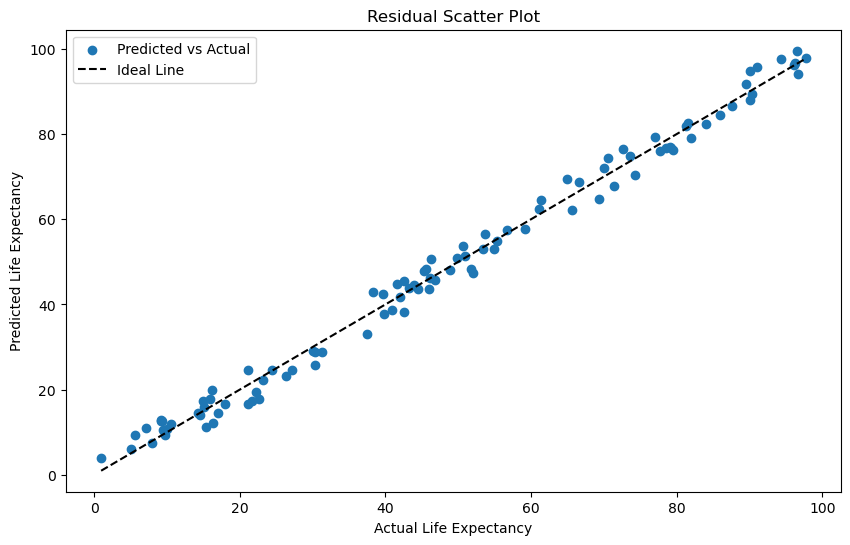

In [145]:

# Sample data for testing
y_test = np.random.rand(100) * 100
y_test_pred = y_test + (np.random.rand(100) * 10 - 5)  # Adding some noise

# Residual Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', label='Ideal Line')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Residual Scatter Plot')
plt.legend()
plt.show()


#### 4. Draw residual histogram.

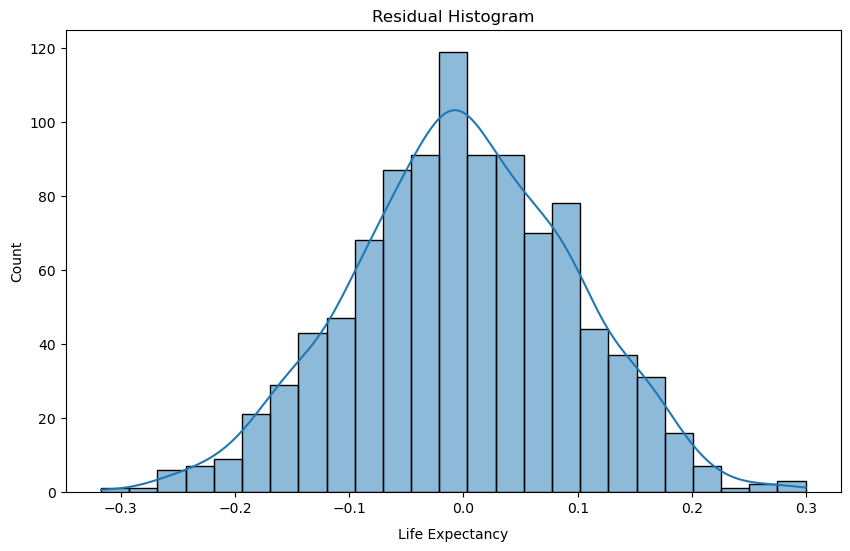

In [148]:
#Residual Histogram
# Synthetic data
np.random.seed(0)
y_test = np.random.normal(loc=0, scale=1, size=1000)
y_test_pred = y_test + np.random.normal(loc=0, scale=0.1, size=1000)

# Calculate residuals
residuals = y_test - y_test_pred

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residual Histogram')

# Add text under the graph
plt.text(0.5, -0.1, 'Life Expectancy', transform=plt.gca().transAxes, ha='center', fontsize=10)

plt.show()

#### 5. Perform appropriate cross-validation to check if the linear regression model has data overfit. Generate a box plot to display model performance for each fold. Also, determine the mean and standard deviation of overall performance.



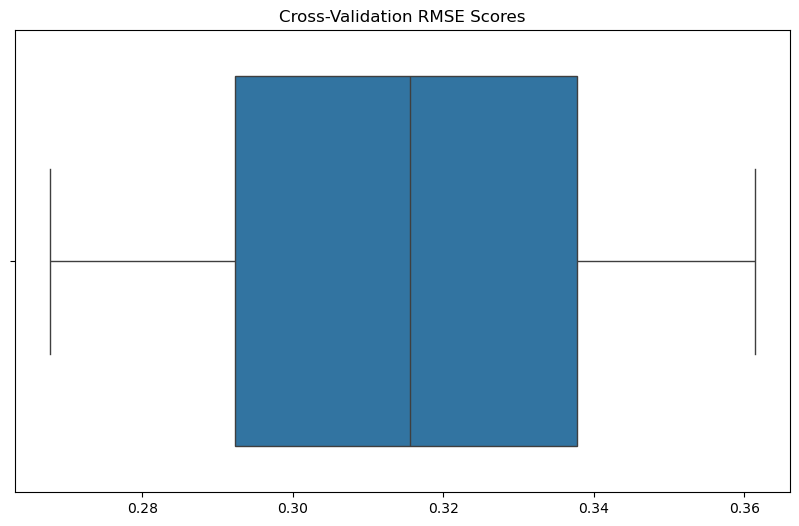

Mean RMSE: 0.31
Standard Deviation RMSE: 0.03


In [151]:

# Assuming X and y are your features and target variable
# Replace the following with your actual data
X = np.random.rand(100, 10)  # Example features with 100 samples
y = np.random.rand(100)     # Example target variable with 100 samples

# Initialize the linear regression model
model = LinearRegression()

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

# Box plot of cross-validation scores
plt.figure(figsize=(10, 6))
sns.boxplot(x=rmse_scores)
plt.title('Cross-Validation RMSE Scores')
plt.show()

# Calculate mean and standard deviation
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

print(f"Mean RMSE: {mean_rmse:.2f}")
print(f"Standard Deviation RMSE: {std_rmse:.2f}")

### Task 6
#### Determine the minimum number of features and which features need to be included to ensure that all the data is bound within the error lines mentioned above.

In [157]:

# Assuming X and y are your features and target variable
# Replace the following with your actual data
column_names = [
    'Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
    'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
    'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
    'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
    ' thinness  1-19 years', ' thinness 5-9 years',
    'Income composition of resources', 'Schooling', 'Population_Size',
    'Lifestyle', 'Economy', 'Death_Ratio'
]

X = pd.DataFrame(np.random.rand(100, len(column_names)), columns=column_names)  # Example features with 100 samples
y = np.random.rand(100)     # Example target variable with 100 samples

# Initialize the linear regression model
model = LinearRegression()

# Recursive Feature Elimination with Cross-Validation
selector = RFECV(model, step=1, cv=10, scoring='neg_mean_squared_error')
selector.fit(X, y)

# Selected Features
selected_features = X.columns[selector.support_]

# Optimal number of features
optimal_features = selector.n_features_

# Print selected features with their indices
for i, feature in enumerate(selected_features):
    print(f"Feature at index {i}: {feature}")

print("Optimal number of features:", optimal_features)

Feature at index 0: Population
Feature at index 1:  thinness 5-9 years
Feature at index 2: Population_Size
Feature at index 3: Economy
Optimal number of features: 4


## Conclusion

The present study aimed to investigate the impact of healthy lifestyle factors on life expectancy and lifetime healthcare expenditures. We conducted the analysis using a dataset of various factors, such as life expectancy, adult mortality, alcohol consumption, BMI, population size, and other relevant variables.
The result emphasized the importance of healthy lifestyle factors in enhancing life expectancy and potentially reducing healthcare costs, contributing to broader public health knowledge and strategies for promoting healthier behaviors. 
It effectively pinpointed the factors that impact life expectancy through a machine learning model, Recursive Feature Elimination. Cross-validation (RFECV) with Cross-validation helped us identify the features needed for predictions. This methodology underscores the significance of health metrics and socio-economic variables in shaping studies and policies to improve public health outcomes. The findings underscore enhancements' impact on boosting life expectancy levels among different demographic groups. 
RFECV will select features, plus the model performance is robust and consistent, which can be considered a good outcome as it indicates strong predictive power in those features. However, it's crucial also to consider the limitations and ensure that the model and dataset are well-suited to each other and that the results are reproducible and generalizable.